In [64]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib inline

In [65]:
vcenter = pd.read_csv('./2019-06-02/volt_center_daedalus_voltCenter_calib_2019-06-02_2.csv',comment="#")

In [66]:
vcenter_pos_field = vcenter[vcenter.Yfield<0].reset_index()
vcenter_neg_field = vcenter[vcenter.Yfield>0].reset_index()

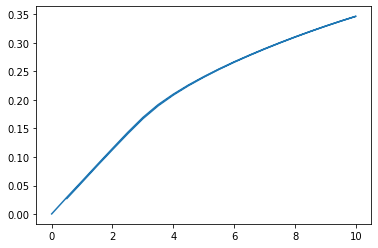

In [11]:
plt.plot(vcenter_pos_field.V, -vcenter_pos_field.Yfield)

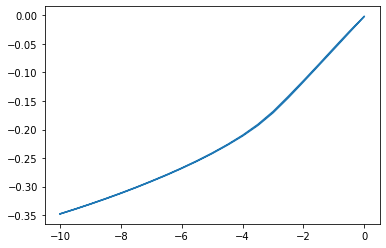

In [12]:
plt.plot(vcenter_neg_field.V, -vcenter_neg_field.Yfield)

# Determine best poly fit degree using adjusted r square

In [73]:
def r_square_adj(x, y, yfit, n, p):
    ss_tot = sum((y-np.mean(y))**2)
    ss_res = sum((y-yfit)**2)
    R2 = 1 - ss_res/ss_tot
    R2_adj = 1-(1-R2)*(n-1)/(n-p-1)
    return R2_adj

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd 

[-2.22044605e-16  9.49402548e-01  9.97611173e-01  9.99330459e-01
  9.99545977e-01  9.99885557e-01  9.99896114e-01  9.99920638e-01
  9.99936307e-01  9.99934297e-01  9.99937830e-01  9.99937579e-01
  9.99935577e-01  9.99934705e-01  9.99932731e-01  9.99930049e-01
  9.99927154e-01  9.99923993e-01  9.99920555e-01  9.99916837e-01
  9.99912638e-01  9.99908690e-01  9.99903265e-01  9.99897379e-01
  9.99890861e-01  9.99886803e-01  9.99877654e-01  9.99867439e-01
  9.99855792e-01  9.99842234e-01  9.99826119e-01  9.99806539e-01
  9.99793420e-01  9.99761857e-01  9.99720113e-01  9.99662069e-01
  9.99575448e-01  9.99431584e-01  9.99144474e-01  9.98284136e-01]


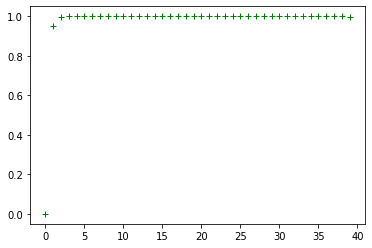

In [109]:
n = len(vcenter_pos_field.V)
x = vcenter_pos_field.V.values
y = -vcenter_pos_field.Yfield.values
r2_array = np.array([r_square_adj(x, y, np.poly1d(np.polyfit(x, y, i))(x), n = 41, p = i) for i in range(40)])
plt.plot(range(40), r2_array, 'g+')
print(r2_array)

Seems like 5 is sufficient

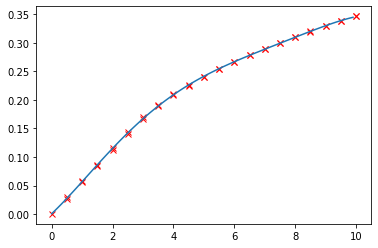

In [110]:
pos_coeffs = np.polyfit(vcenter_pos_field.V, -vcenter_pos_field.Yfield, 5)
pos_fit = np.poly1d(pos_coeffs)
plt.plot(vcenter_pos_field.V, -vcenter_pos_field.Yfield, 'rx')
plt.plot(np.arange(0, 10, 0.1), pos_fit(np.arange(0, 10, 0.1)))

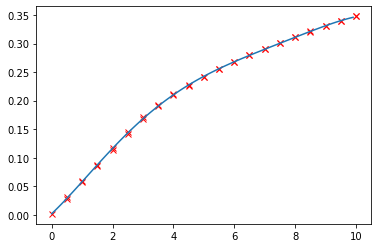

In [113]:
neg_coeffs = np.polyfit(-vcenter_neg_field.V, vcenter_neg_field.Yfield, 5)
neg_fit = np.poly1d(neg_coeffs)
plt.plot(-vcenter_neg_field.V, vcenter_neg_field.Yfield, 'rx')
plt.plot(np.arange(0, 10, 0.1), neg_fit(np.arange(0, 10, 0.1)))

In [112]:
print(pos_coeffs)
print(neg_coeffs)

[-1.27555956e-05  3.49741274e-04 -3.24213871e-03  8.62127928e-03
  5.03346214e-02  7.47076595e-04]
[ 1.27910181e-05 -3.50472182e-04  3.24681730e-03 -8.62856386e-03
 -5.03492266e-02 -1.99046507e-03]
